In [22]:
import pandas as pd
import numpy as np
import torch as torch
import os, sys
import math


import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

from scipy.stats import pearsonr

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.nn.modules.transformer import MultiheadAttention, _get_activation_fn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn.functional as F

from sklearn import linear_model
import seaborn as sb

import random

In [18]:
from google.colab import drive

drive.mount('/content/gdrive/')

os.chdir("/content/gdrive//MyDrive/Transformer") # change to your directory
print("The path is:", os.getcwd() )
print("All the files are: ",os.listdir())

random.seed(612)


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
The path is: /content/gdrive/MyDrive/Transformer
All the files are:  ['fullDatasetSW.csv', 'fullDatasetDM.csv', 'fullDatasetDF.csv', 'dependencies.py', 'fullDatasetSY (1).csv', 'tokenTrainingSY.csv', 'tokenTrainingSW.csv', 'tokenTrainingDM.csv', 'tokenTrainingDF.csv', 'tokenTrainingObsData.csv', 'SNPpositions (1).xlsx', 'finalTrainingSet.xlsx', '2021TrainingPhenotypes.xlsx', 'YieldOnlyTransformer', '2021_Training_Set_Tokenized.csv', '100SeedWeightEffects.csv', 'PlotWeightEffects.csv', 'MoistureEffects.csv', 'DaysToFloweringEffects (1).csv', 'YieldEffects.csv', 'DaysToFloweringEffects.csv', 'noTokenresultsRR.csv', 'loss_values_dModels_300.csv', '100 Seed weighteffects.csv', '100 Seed weightallTrueEstimated.csv', '100 Seed weighttokenTrainingSet.csv', 'Plot WeightallTrueEstimated.csv', 'Plot Weighteffects.csv', 'Plot WeighttokenTrainingSet.csv', 'Moistureal

In [23]:
data = pd.read_csv("fullDatasetSY.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140
0,0,X.CADV2015.,CA,CDBN_054,1774.08,0.0,0.0,2.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0
1,1,X.CADV2015..1,CA,CDBN_351,1908.48,0.0,2.0,2.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0
2,2,X.CADV2015..2,CA,CDBN_171,871.36,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0
3,3,X.CADV2015..3,CA,CDBN_345,1779.68,2.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0
4,4,X.CADV2015..4,CA,CDBN_332,2347.52,2.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,4686,X.KSTR1982..4,KS,CDBN_122,1770.72,1.0,0.0,0.0,1.0,2.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0
4687,4687,X.KSTR1982..6,KS,CDBN_260,2134.72,2.0,2.0,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0
4688,4688,X.KSTR1982..15,KS,CDBN_202,3078.88,2.0,2.0,2.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0
4689,4689,X.KSTR1982..16,KS,CDBN_131,2061.92,1.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0


Text(0.5, 1.0, 'Seed Yield Distribution')

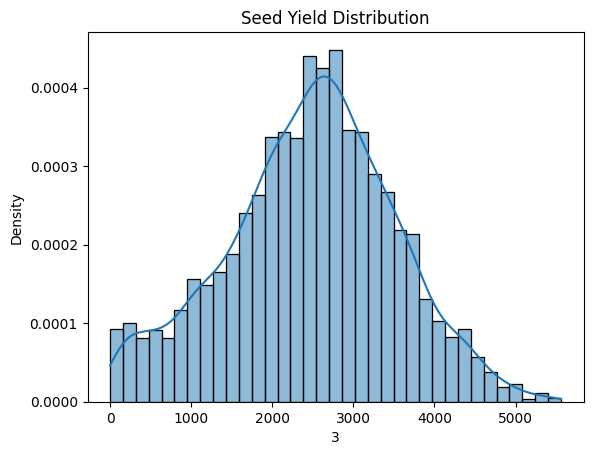

In [ ]:
sb.histplot(data['3'],kde=True,stat="density").set_title("Seed Yield Distribution")

In [24]:
X = data.drop(['Unnamed: 0','0','1','2','3'],axis = 1)
threshold = 0.01
X = X.drop(X.var()[X.var() < threshold].index.values, axis=1)

y = data["3"]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, shuffle=True)
xTest, xValid, yTest, yValid = train_test_split(xTest, yTest, test_size=0.5, shuffle=True)

'''determine best alpha value for RR'''

alphaValues = {}
params =[0.01,0.1,1,10,100,1000]
for values in params:
  LR = linear_model.Ridge(values)
  LR.fit(xTrain, yTrain)
  yPred = LR.predict(xValid)
  yValid = np.array(yValid)
  alphaValues[values] = np.corrcoef(yPred, yValid)[0,1]
  alphaVal = max(alphaValues, key=alphaValues.get)

print(alphaVal)



1000


In [25]:
X = data.drop(['Unnamed: 0','0','1','2','3'],axis = 1)
threshold = 0.01
X = X.drop(X.var()[X.var() < threshold].index.values, axis=1)

y = data["3"]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, shuffle=True)
xTest, xValid, yTest, yValid = train_test_split(xTest, yTest, test_size=0.5, shuffle=True)
# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores
rmse_scores = []
correlation_scores = []

foldAccs = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    RR = linear_model.Ridge(alphaVal)
    RR.fit(X_train, y_train)

    # Make predictions
    y_pred = RR.predict(X_test)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # Compute Pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    correlation_scores.append(corr)
    foldMean = np.mean(correlation_scores)
    foldAccs.append(foldMean)

print(np.mean(foldAccs))


0.23857607890320698


In [27]:



testProp = [slice(0, int(round(X.shape[0]*0.6,0))), slice(0, int(round(X.shape[0]*0.7,0))), slice(0, int(round(X.shape[0]*0.8,0))), slice(0, int(round(X.shape[0]*0.9,0))),slice(0, int(round(X.shape[0]*0.99,0)))]

correlation_scores = []
for x in testProp:

  trainingSet = data.iloc[0:int(round(X.shape[0]*0.6,0)),]
  testSet = data.iloc[x,]

  x_train = trainingSet.drop(["Unnamed: 0","0",'1','2','3'],axis=1)
  y_train = trainingSet["3"]
  x_test = testSet.drop(["Unnamed: 0","0",'1','2','3'],axis=1)
  y_test = testSet["3"]

  # Fit the model
  RR = linear_model.Ridge(alphaVal)
  RR.fit(x_train, y_train)

  # Make predictions
  y_pred = RR.predict(x_test)

  # Compute RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  rmse_scores.append(rmse)

  # Compute Pearson correlation
  corr, _ = pearsonr(y_test, y_pred)
  correlation_scores.append(corr)

correlation_df = pd.DataFrame(correlation_scores).transpose()
correlation_df = correlation_df.rename(columns={0: '0.6', 1: '0.7', 2: '0.8', 3: '0.9',4:'1.0'})

correlation_df


,0.6,0.7,0.8,0.9,1.0
0,0.352761,0.348568,0.326786,0.318899,0.288415
